In [ ]:
pip install patool

In [ ]:
pip install easyocr

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import patoolib
import os

In [ ]:
rar_file_path = "/content/Sudoku.rar"
output_dir = "/content/extracted_images"

os.makedirs(output_dir, exist_ok=True)

patoolib.extract_archive(rar_file_path, outdir=output_dir)

INFO patool: Extracting /content/Sudoku.rar ...
INFO:patool:Extracting /content/Sudoku.rar ...
INFO patool: running /usr/bin/unrar x -kb -or -- /content/Sudoku.rar
INFO:patool:running /usr/bin/unrar x -kb -or -- /content/Sudoku.rar
INFO patool: ... /content/Sudoku.rar extracted to `/content/extracted_images'.
INFO:patool:... /content/Sudoku.rar extracted to `/content/extracted_images'.


'/content/extracted_images'

In [ ]:
os.listdir("/content/extracted_images")

['sudoku5(3).jpg',
 '25(2).jpg',
 '36(6).jpg',
 '007(2).jpg',
 '1.jpg',
 '001(3).jpg',
 '007.jpg',
 'sudoku1.jpg',
 'izi_distord(1).jpg',
 'sudoku5.jpg',
 'sudoku2(3).jpg',
 '007(5).jpg',
 '009.jpg',
 'sudoku1(5).jpg',
 '007(1).jpg',
 '36(5).jpg',
 '002(5).jpg',
 '010(2).jpg',
 'sudoku2(4).jpg',
 '25(5).jpg',
 'imagedouble(3).jpg',
 'sudoku5(1).jpg',
 '002(6).jpg',
 '010(3).jpg',
 '25(1).jpg',
 'imagedouble.jpg',
 'sudoku(3).jpg',
 '36.jpg',
 'izi_distord(3).jpg',
 '001(2).jpg',
 '009(4).jpg',
 '36(1).jpg',
 '001(6).jpg',
 'izi_distord(4).jpg',
 '1(5).jpg',
 '009(6).jpg',
 '25.jpg',
 'izi_distord(2).jpg',
 '36(3).jpg',
 '1(6).jpg',
 '010.jpg',
 'sudoku(5).jpg',
 'sudoku2(1).jpg',
 '010(4).jpg',
 '010(1).jpg',
 '36(4).jpg',
 'sudoku(6).jpg',
 '25(4).jpg',
 'sudoku(1).jpg',
 '36(2).jpg',
 '010(6).jpg',
 '010(5).jpg',
 '25(3).jpg',
 '007(4).jpg',
 'sudoku.jpg',
 '1(1).jpg',
 'izi_distord(5).jpg',
 'imagedouble(2).jpg',
 'sudoku1(4).jpg',
 'sudoku1(6).jpg',
 '002(1).jpg',
 '009(1).jpg',
 '

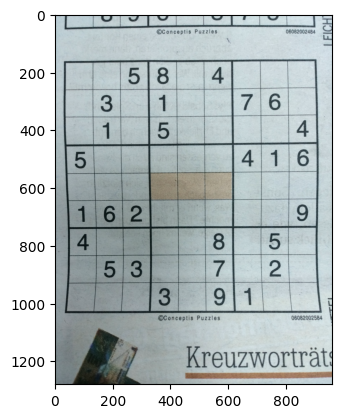

In [ ]:
sudoku_a = cv2.imread('/content/extracted_images/007.jpg')
plt.figure()
plt.imshow(sudoku_a)
plt.show()

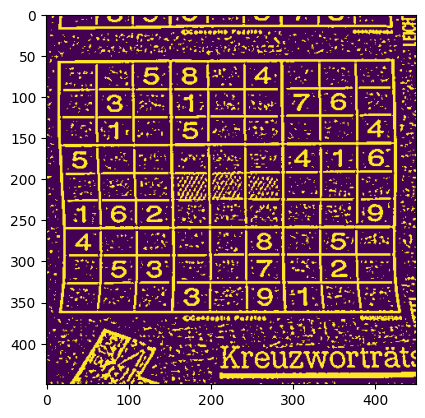

In [ ]:
sudoku_a = cv2.resize(sudoku_a, (450, 450))
def preprocess(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (3, 3), 6)
  threshold_img = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
  return threshold_img

threshold = preprocess(sudoku_a)
plt.figure()
plt.imshow(threshold)
plt.show()

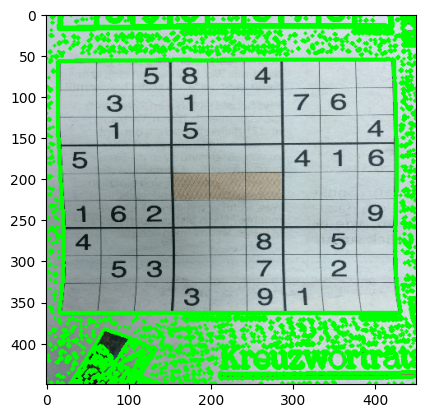

In [ ]:
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hirerarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)
plt.figure()
plt.imshow(contour_1)
plt.show()

Points shape: (4, 1, 2)
Points flat shape: (4, 2)
Add array: [478  71 377 793]
Diff array: [-368   43  347  -67]


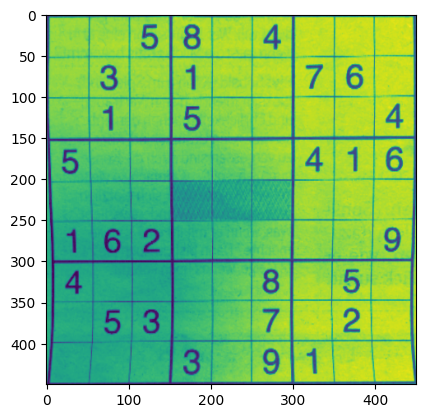

In [ ]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    approx = np.array([])

    for i in contour:
        area = cv2.contourArea(i)
        if area > 5000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area

    return biggest, max_area

def reframe(points):
   if points.ndim == 2:
       points = points.reshape((4, 1, 2))

   points_flat = points.reshape((4, 2))

   print("Points shape:", points.shape)
   print("Points flat shape:", points_flat.shape)

   add = points_flat.sum(axis=1)
   diff = np.diff(points_flat, axis=1).flatten()

   print("Add array:", add)
   print("Diff array:", diff)

   points_new = np.zeros((4, 1, 2), dtype=np.int32)
   points_new[0] = points[np.argmin(add)]
   points_new[3] = points[np.argmax(add)]
   points_new[1] = points[np.argmin(diff)]
   points_new[2] = points[np.argmax(diff)]

   return points_new

#if biggest.size != 0:
#   biggest = reframe(biggest)  # This will now print debug info
#  cv2.drawContours(contour_2, biggest, -1, (0, 255, 0), 10)

def splitcells(img):
  rows = np.vsplit(img, 9)
  boxes = []
  for r in rows:
    cols = np.hsplit(r,9)
    for box in cols:
      boxes.append(box)
      return boxes

black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)

if biggest.size != 0:
  biggest = reframe(biggest)
  cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
  pts1 = np.float32(biggest)
  pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
  matrix = cv2.getPerspectiveTransform(pts1,pts2)
  imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
  imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(imagewrap)
plt.show()

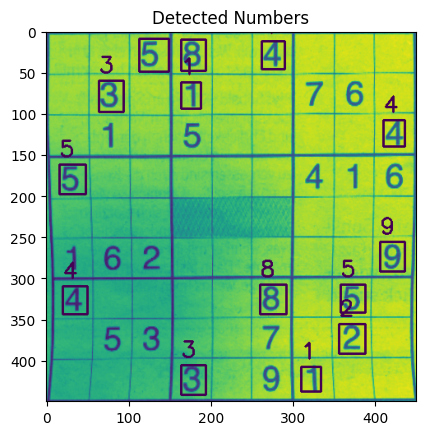

Number 5 is in row 7, column 8
Number 8 is in row 7, column 6
Number 4 is in row 7, column 1
Number 3 is in row 9, column 4
Number 1 is in row 9, column 7
Number 9 is in row 6, column 9
Number 2 is in row 8, column 8


In [ ]:
import easyocr
import numpy as np
import cv2
import matplotlib.pyplot as plt

def extract_sudoku_grid_with_positions(image):
    reader = easyocr.Reader(['en'])
    results = reader.readtext(image, detail=1)
    grid = np.zeros((9, 9), dtype=int)
    number_positions = {}

    for result in results:
        bbox, text, _ = result
        if text.isdigit() and int(text) in range(1, 10):
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            br = (int(br[0]), int(br[1]))

            cell_size = 50
            row = (tl[1] + br[1]) // (2 * cell_size)
            col = (tl[0] + br[0]) // (2 * cell_size)

            grid[row, col] = int(text)
            number_positions[int(text)] = (row, col)

            cv2.rectangle(image, tl, br, (0, 255, 0), 2)
            cv2.putText(image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    return grid, number_positions, image

grid, number_positions, image_with_boxes = extract_sudoku_grid_with_positions(imagewrap)

plt.figure()
plt.imshow(image_with_boxes)
plt.title("Detected Numbers")
plt.show()

for number, position in number_positions.items():
    row, col = position
    print(f"Number {number} is in row {row + 1}, column {col + 1}")

In [ ]:
import easyocr
import numpy as np
import cv2

def extract_sudoku_grid(image):
    reader = easyocr.Reader(['en'])
    results = reader.readtext(image, detail=1)  
    grid = np.zeros((9, 9), dtype=int)

    for result in results:  
        bbox, text, _ = result  
        if text.isdigit() and int(text) in range(1, 10):  
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            br = (int(br[0]), int(br[1]))

            cell_size = 50
            row = (tl[1] + br[1]) // (2 * cell_size)
            col = (tl[0] + br[0]) // (2 * cell_size)

            grid[row, col] = int(text)

    return grid

In [ ]:
def solve_sudoku(grid):
    find = find_empty(grid)
    if not find:
        return True
    else:
        row, col = find

    for num in range(1, 10):
        if is_valid(grid, num, (row, col)):
            grid[row][col] = num

            if solve_sudoku(grid):
                return True

            grid[row][col] = 0

    return False

def find_empty(grid):
    for i in range(9):
        for j in range(9):
            if grid[i][j] == 0:
                return (i, j)

    return None

def is_valid(grid, num, pos):
    for i in range(9):
        if grid[pos[0]][i] == num and pos[1] != i:
            return False

    for i in range(9):
        if grid[i][pos[1]] == num and pos[0] != i:
            return False

    box_x = pos[1] // 3
    box_y = pos[0] // 3

    for i in range(box_y * 3, box_y * 3 + 3):
        for j in range(box_x * 3, box_x * 3 + 3):
            if grid[i][j] == num and (i, j) != pos:
                return False

    return True

In [ ]:
def display_sudoku_grid(grid):
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - - - ")
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print(" | ", end="")
            if j == 8:
                print(grid[i][j])
            else:
                print(str(grid[i][j]) + " ", end="")

In [ ]:
grid = extract_sudoku_grid(imagewrap)

if solve_sudoku(grid):
    print("Sudoku Solved:")
    display_sudoku_grid(grid)
else:
    print("No solution found.")

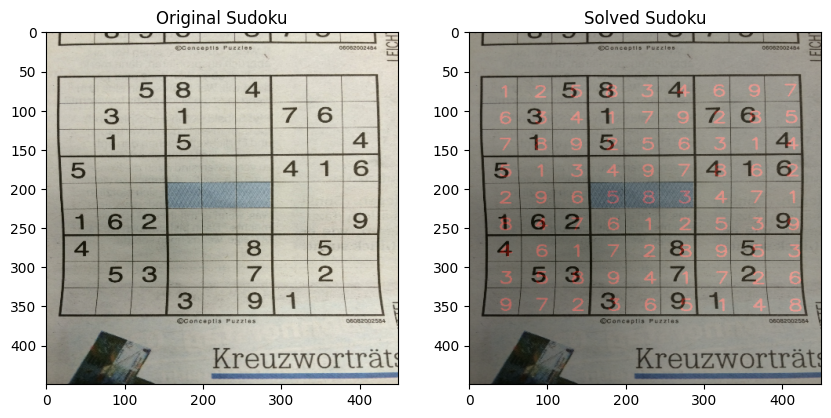

In [ ]:
solved_grid_image = np.zeros_like(sudoku_a)
for i in range(9):
    for j in range(9):
        cv2.putText(solved_grid_image, str(grid[i][j]),
                       (j * 50 + 25, i * 50 + 40),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

inverted_matrix = cv2.getPerspectiveTransform(pts2, pts1)
warped_solved_grid = cv2.warpPerspective(solved_grid_image, inverted_matrix, (sudoku_a.shape[1], sudoku_a.shape[0]))

combined_image = cv2.addWeighted(sudoku_a, 0.7, warped_solved_grid, 0.3, 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sudoku_a, cv2.COLOR_BGR2RGB))
plt.title("Original Sudoku")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title("Solved Sudoku")
plt.show()